<a href="https://colab.research.google.com/github/SATYA1962S/digit_1/blob/main/Copy_of_Extrovert_vz_introvert_%7C_HistGradientBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rakeshkapilavai_extrovert_vs_introvert_behavior_data_path = kagglehub.dataset_download('rakeshkapilavai/extrovert-vs-introvert-behavior-data')

print('Data source import complete.')


Data source import complete.


<h2 style="
  padding: 22px;
  border-radius: 10px;
  background: linear-gradient(to right, #495867, #495867);
  color: white;
  font-weight: bold;
  text-align: center;
">
  0. Introduction

</h2>


### 🧠Project Overview

---

Build and evaluate a machine learning pipeline to classify individuals as extroverts or introverts based on behavioral and social indicators from the Extrovert vs. Introvert Personality Traits Dataset. The goal is to accurately capture patterns in personality traits, enabling predictive modeling that can support psychological research, user profiling, or recommendation systems.

---

<h2 style="
  padding: 22px;
  border-radius: 10px;
  background: linear-gradient(to right, #495867, #495867);
  color: white;
  font-weight: bold;
  text-align: center;
">
  1. Data visualization

</h2>

In [ ]:
import pandas as pd
import numpy as np

#Eda
import matplotlib.pyplot as plt
import seaborn as sns

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectKBest, f_classif

# Model
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv')

In [ ]:
df.head(8)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,NaN,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert


In [ ]:
df.describe(include='all')

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2837.000000,2827,2838.000000,2834.000000,2848,2823.000000,2835.000000,2900
unique,NaN,2,NaN,NaN,2,NaN,NaN,2
top,NaN,No,NaN,NaN,No,NaN,NaN,Extrovert
freq,NaN,1417,NaN,NaN,1441,NaN,NaN,1491
mean,4.505816,NaN,3.963354,3.000000,NaN,6.268863,3.564727,NaN
std,3.479192,NaN,2.903827,2.247327,NaN,4.289693,2.926582,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,2.000000,NaN,2.000000,1.000000,NaN,3.000000,1.000000,NaN
50%,4.000000,NaN,3.000000,3.000000,NaN,5.000000,3.000000,NaN
75%,8.000000,NaN,6.000000,5.000000,NaN,10.000000,6.000000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


<h2 style="
  padding: 22px;
  border-radius: 10px;
  background: linear-gradient(to right, #495867, #495867);
  color: white;
  font-weight: bold;
  text-align: center;
">
  2. Data Exploration (EDA)
</h2>

In [ ]:
# EDA values
x_values = df.select_dtypes(include=['number'])

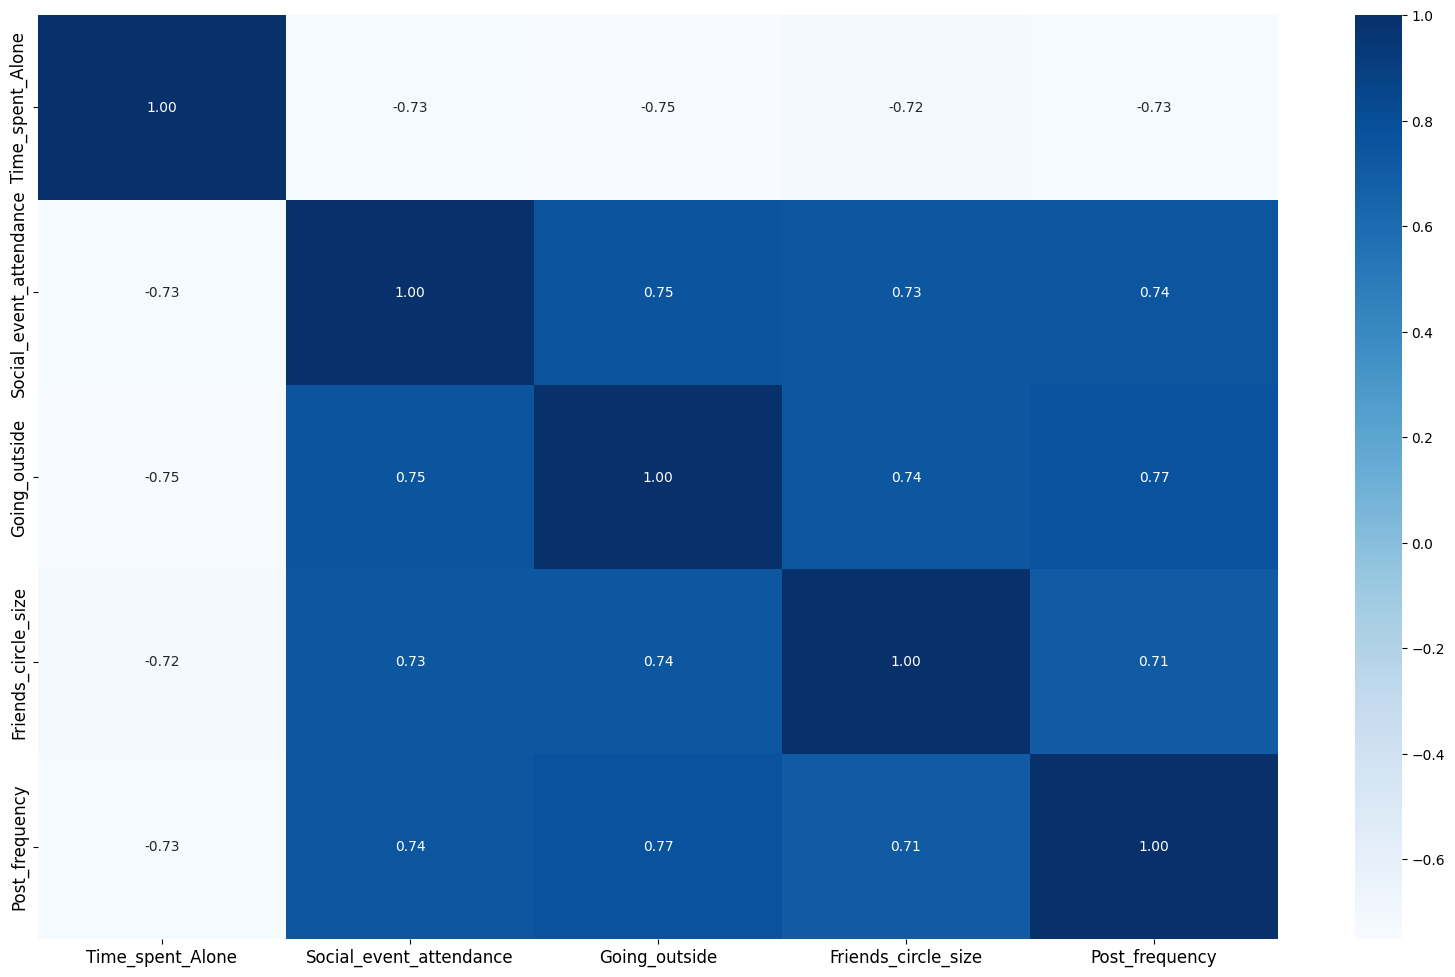

In [ ]:

corr_matrix = x_values.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

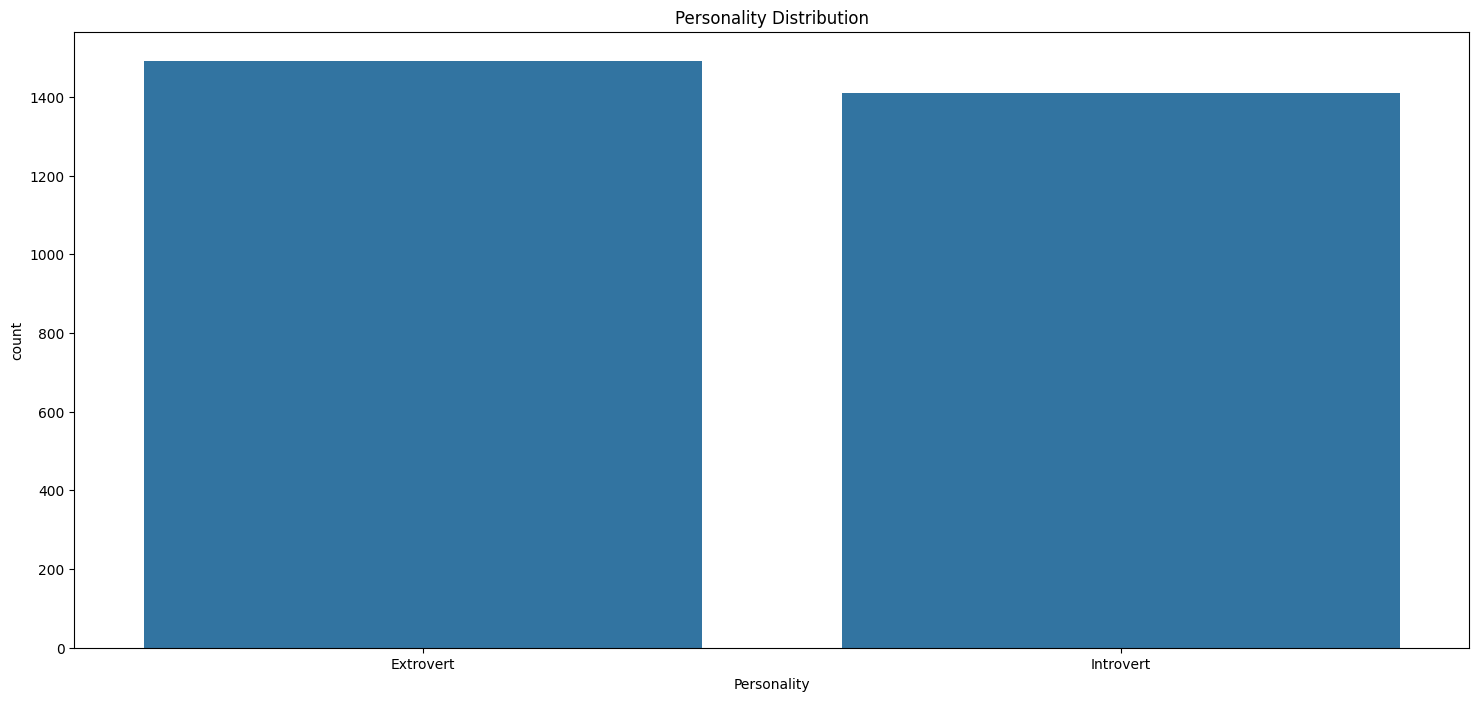

In [ ]:

plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='Personality')
plt.title('Personality Distribution')
plt.show()

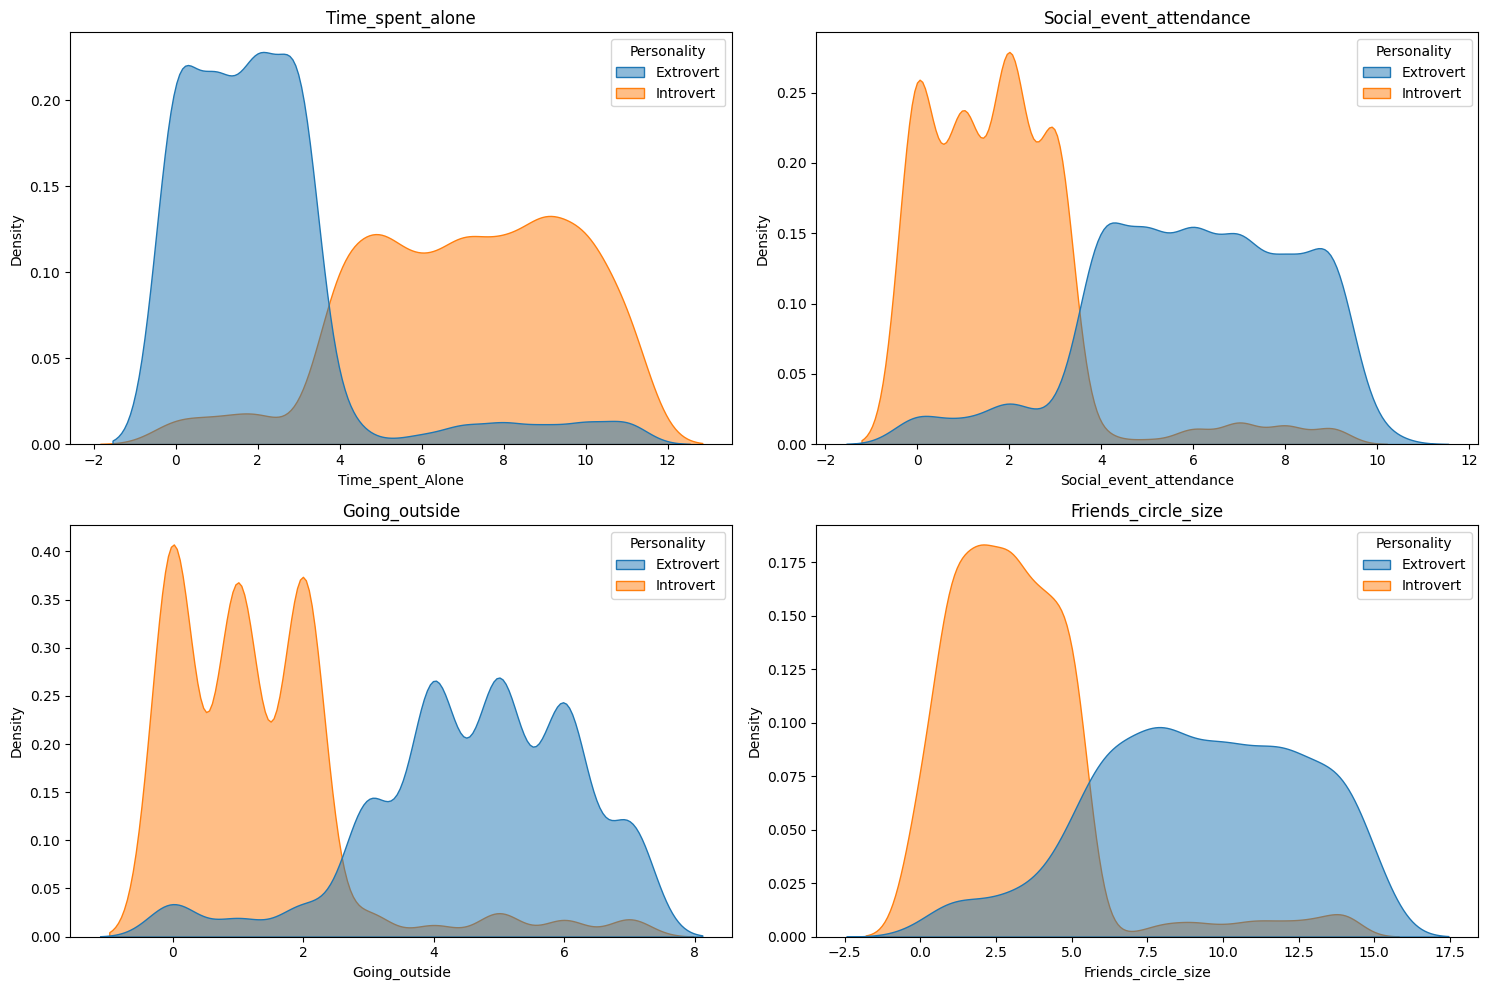

In [ ]:

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for ax, x_value in zip(axis.flat, x_values):
    sns.kdeplot(data=df, x=x_value, hue='Personality', fill=True, common_norm=False, alpha=0.5, ax=ax)
    ax.set_title(f'{x_value.capitalize()}')
plt.tight_layout()
plt.show()

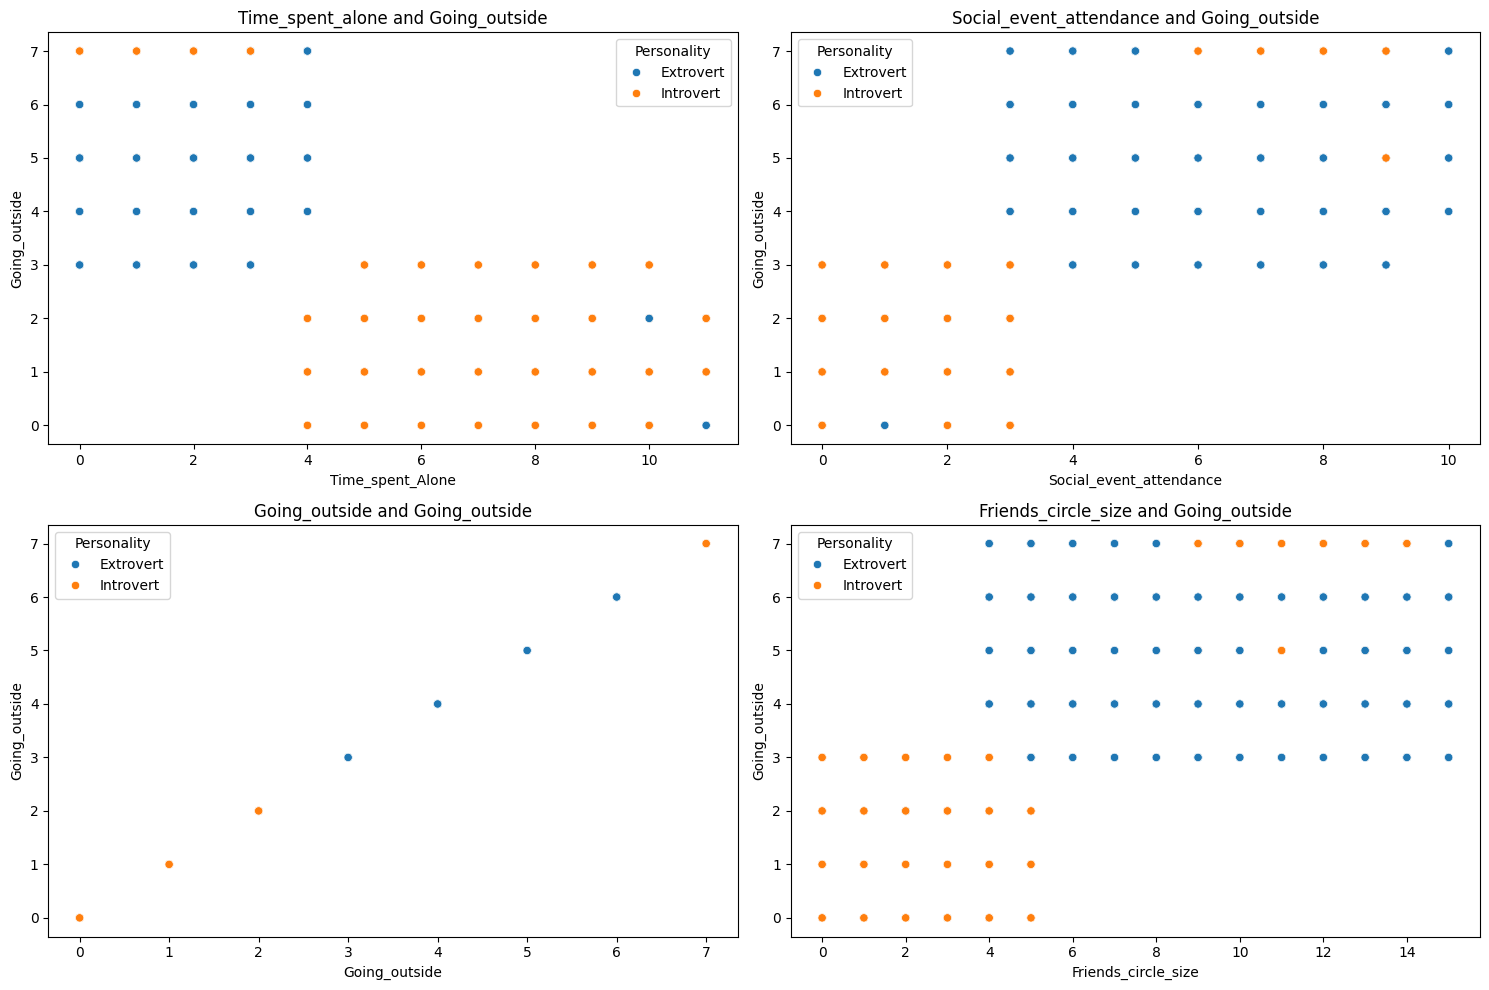

In [ ]:

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
y_value = 'Going_outside'

for ax, x_value in zip(axis.flat, x_values):
    sns.scatterplot(data=df, x=x_value, y=y_value, ax=ax,hue=df['Personality'])
    ax.set_title(f'{x_value.capitalize()} and {y_value.capitalize()}')

plt.tight_layout()
plt.show()

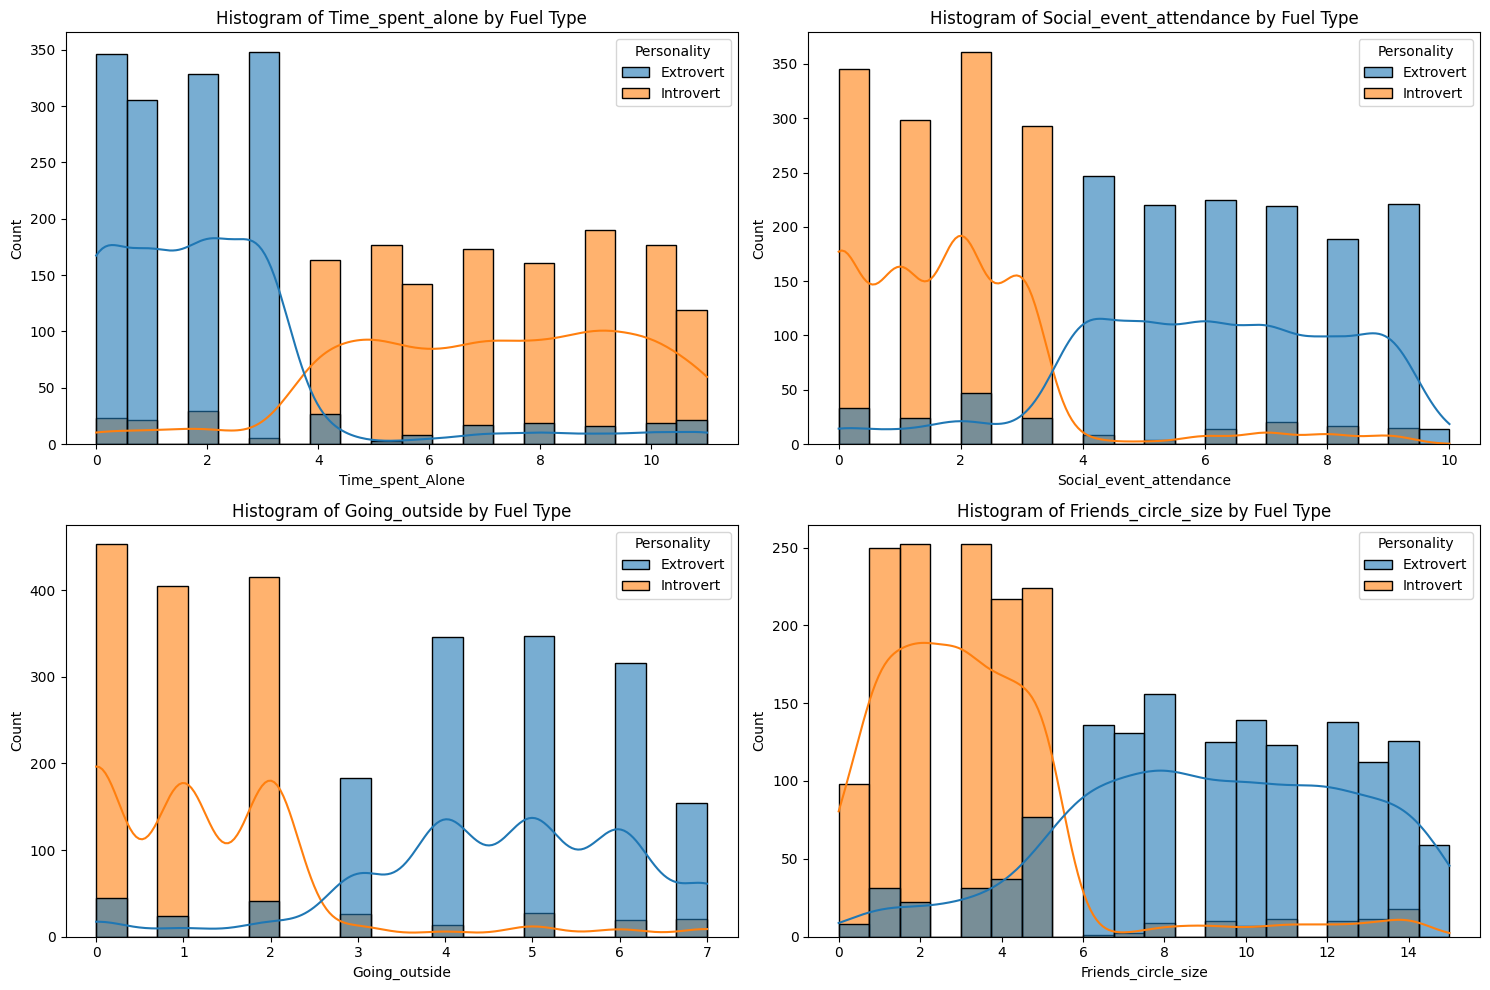

In [ ]:

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for ax, x_value in zip(axis.flat, x_values):
    sns.histplot(data=df, x=x_value, hue="Personality", kde=True, ax=ax, bins=20, alpha=0.6)
    ax.set_title(f'Histogram of {x_value.capitalize()} by Fuel Type')
plt.tight_layout()
plt.show()

<h2 style="
  padding: 22px;
  border-radius: 10px;
  background: linear-gradient(to right, #495867, #495867);
  color: white;
  font-weight: bold;
  text-align: center;
">
  3. HistGradientBoostingClassifier Pipiline
</h2>

### 🎯Goal:

---

Develop a machine learning model capable of accurately classifying the ripeness stage of Hass avocados using physical measurements such as weight, skin color, and firmness. This model aims to support agricultural and supply chain decisions by providing a reliable, automated method for assessing fruit ripeness, potentially reducing waste and improving product quality in distribution.

---

In [ ]:
# Separation of features and target
X = df.drop('Personality',axis=1)
y = df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

numerical_columns = list(X_train.select_dtypes(include=['float64', 'int64']).columns)
categorical_columns = list(X_train.select_dtypes(include=['object', 'category']).columns)

In [ ]:
#OutlierClipper
class OutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, quantile=0.01):
        self.quantile = quantile

    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.columns_ = X.columns
            X_df = X
        else:
            self.columns_ = [f'x{i}' for i in range(X.shape[1])]
            X_df = pd.DataFrame(X, columns=self.columns_)
        self.lower_ = X_df.quantile(self.quantile)
        self.upper_ = X_df.quantile(1 - self.quantile)
        return self

    def transform(self, X):
        X_df = pd.DataFrame(X, columns=self.columns_)
        X_clipped = X_df.clip(self.lower_, self.upper_, axis=1)
        return X_clipped.values

In [ ]:
#Pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('outlier_clipper', OutlierClipper(quantile=0.01)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_columns),
    ('cat', cat_pipeline, categorical_columns)
])

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k='all')),
    ('classifier',HistGradientBoostingClassifier(random_state=42))
])

<h2 style="
  padding: 22px;
  border-radius: 10px;
  background: linear-gradient(to right, #495867, #495867);
  color: white;
  font-weight: bold;
  text-align: center;
">
  4.Pipeline Validation
</h2>

In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

NameError: name 'pipeline' is not defined

In [ ]:
# Pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('outlier_clipper', OutlierClipper(quantile=0.01)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_columns),
    ('cat', cat_pipeline, categorical_columns)
])

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k='all')),
    ('classifier',HistGradientBoostingClassifier(random_state=42))
])

In [ ]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

NameError: name 'y_pred' is not defined

In [ ]:
# First, define the pipeline (assuming this cell was run successfully before)
# file ipython-input-0-a10e198a1245
#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import HistGradientBoostingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Assuming df, X, y, X_train, X_test, y_train, y_test, numerical_columns, and categorical_columns are defined from previous steps

class OutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, quantile=0.01):
        self.quantile = quantile

    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.columns_ = X.columns
            X_df = X
        else:
            self.columns_ = [f'x{i}' for i in range(X.shape[1])]
            X_df = pd.DataFrame(X, columns=self.columns_)
        self.lower_ = X_df.quantile(self.quantile)
        self.upper_ = X_df.quantile(1 - self.quantile)
        return self

    def transform(self, X):
        X_df = pd.DataFrame(X, columns=self.columns_)
        X_clipped = X_df.clip(self.lower_, self.upper_, axis=1)
        return X_clipped.values


num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('outlier_clipper', OutlierClipper(quantile=0.01)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_columns),
    ('cat', cat_pipeline, categorical_columns)
])

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k='all')),
    ('classifier',HistGradientBoostingClassifier(random_state=42))
])

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

NameError: name 'y_pred' is not defined

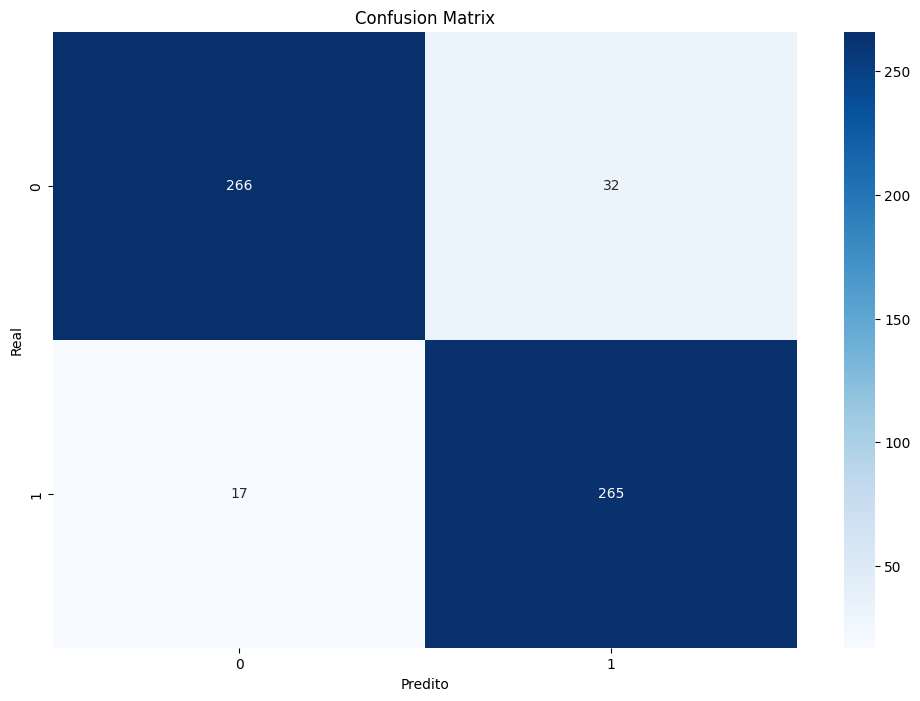

In [ ]:
# Ensure all necessary imports are present
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import HistGradientBoostingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Assuming df, X, y, X_train, X_test, y_train, y_test, numerical_columns, and categorical_columns are defined from previous steps

class OutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, quantile=0.01):
        self.quantile = quantile

    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.columns_ = X.columns
            X_df = X
        else:
            self.columns_ = [f'x{i}' for i in range(X.shape[1])]
            X_df = pd.DataFrame(X, columns=self.columns_)
        self.lower_ = X_df.quantile(self.quantile)
        self.upper_ = X_df.quantile(1 - self.quantile)
        return self

    def transform(self, X):
        X_df = pd.DataFrame(X, columns=self.columns_)
        X_clipped = X_df.clip(self.lower_, self.upper_, axis=1)
        return X_clipped.values

# Define the pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('outlier_clipper', OutlierClipper(quantile=0.01)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_columns),
    ('cat', cat_pipeline, categorical_columns)
])

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k='all')),
    ('classifier',HistGradientBoostingClassifier(random_state=42))
])

# Fit the pipeline and make predictions
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Now calculate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()